<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 4</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 9. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Stau aus dem Nichts</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>



In dieser Aufgabe wollen wir die **Entstehung von Verkehrsstaus** anhand eines relativ simplen Modells verstehen, welches auf dem schon vorher erwähnten Konzept eines **zellulären Automaten** beruht – dem sogenannten Nagel-Schreckenberg-Modell, welches Anfang der 90er Jahre in Köln entwickelt wurde. Die Zellen sind dabei Fahrbahnabschnitte, die entweder von einem Fahrzeug belegt sind oder nicht. Jedes Fahrzeug hat zusätzlich zu seiner Position einen weiteren Parameter, nämlich eine Geschwindigkeit. Der Einfachheit halber umfassen die möglichen Werte für die Geschwindigkeit nur die Zahlen 0,1,2,3,4,5.

Man kann zu diesem Modell durchaus einen Bezug zur Realität herstellen, in dem man folgende Analogie verwendet:
* Länge einer Zelle $\equiv 7.5\,\text{m}$
* Geschwindigkeit $v \equiv v \cdot 27\,$km/h
* Iterationsschritt $\equiv 1\,s$

Der Iterationsschritt dieses zellulären Automaten besteht aus 4 Teilen:

1. **Beschleunigen**: Die Geschwindigkeiten aller Fahrzeuge werden um $1$ erhöht, solange die Höchstgeschwindigkeit $5$ noch nicht erreicht ist.

2. **Bremsen**: Bei allen Fahrzeugen, deren Abstand zum Vordermann kleiner ist als seine Geschwindigkeit, wird die Geschwindigkeit auf diesen Abstand reduziert.

3. **Trödeln**: Jedes Fahrzeug reduziert seine Geschwindigkeit mit Wahrscheinlichkeit $p$ um eine Einheit.

4. **Bewegung**: Jedes Fahrzeug wird um seine Geschwindigkeit interpretiert in Zellen nach vorne bewegt.

Alle Fahrzeuge durchlaufen diesen Zyklus gleichzeitig, d.h. es werden für jedes Fahrzeug die Werte des vorherigen Zyklusses verwendet und nicht die schon teilweise aktualisierten.

Schreiben Sie ein Programm, welchen den oben beschriebenen zellulären Automaten für eine Fahrbahn von 200 Zellen mit periodischen Randbedingungen (wie eine Rennstrecke ohne Auf- und Abfahrt) umsetzt. Ermöglichen Sie dabei, als Parameter die Trödelwahrscheinlichkeit $p$ und die Verkehrsdichte $d$ (in Fahrzeugen pro Zelle) variabel einzustellen. Visualisieren Sie die Fahrzeuge (z.B. als farbig ausgefüllte Zelle) und erstellen Sie eine weitere Grafik  die Durchschnittsgeschwindigkeit aller Fahrzeuge an.

Wählen Sie zunächst eine gleichmäßig verteilte Startkonfiguration mit ruhenden Fahrzeugen und analysieren Sie die sich entwickelnde Verkehrssituation für folgende Parameter:

1. Überfüllung – $p=0.0$, $d \in [0.2,0.4,0.6,0.8]$,
2. Sonntagsfahrer – $d = 0.2$, $p \in [0.1, 0.2, 0.3]$,
3. Ampelstart – Stellen Sie alle Fahrzeuge zu Beginn direkt hintereinander auf und wählen Sie $p = 0.2$, $d = 0.2$. Wie lange dauert es, bis die entsprechende Durchschnittsgeschwindigkeit aus 2. erreicht ist?

In [1]:
function traffic_automaton(n_cells, density, dawdling, start_positions="shuffle", time_factor=4)
    time_steps = time_factor * n_cells
    traffic = zeros(time_steps, n_cells) # empty image
    average_speed = []
    
    n_cars = Int(ceil(n_cells * density)) # No of cars
    positions = zeros(Int64, n_cars) # car positions
    speeds = ones(n_cars) # actual velocities

    # random start positions
    if start_positions == "shuffle"
        for (i, j) in enumerate(sort(shuffle(collect(1:n_cells))[1:n_cars]))
            positions[i] = j
        end
    elseif start_positions == "trafficlight"
        positions = collect(1:n_cars)
    end

    for step in 1:time_steps
        for i in collect(1:length(positions))
            # adapt speed
            speed = speeds[i]
            # accelerate
            speed < 5 && (speed += 1)
            # decelerate
            space = 6 # > v maximum
            # get space: free cells in between
            i < length(positions) && (i < n_cars && (space = positions[i+1] - positions[i] - 1))
            speed > space && (speed = space)
            # dawdle
            rand() > dawdling && (speed -= 1)
            # correct and save speed
            speed < 0 && (speed = 0)
            speeds[i] = speed
        end

        # move car
        for i in reverse(collect(1:length(positions)))
            position = positions[i] + speeds[i]
            if position <= n_cells
                positions[i] = position
            else
                deleteat!(positions, i)
                deleteat!(speeds, i)
            end
        end
        
        # Speichere aktuelles Bild
        line_image = zeros(n_cells)
        for c in 1:length(positions)
            line_image[positions[c]] = speeds[c]
        end
        
        traffic[step, :] = line_image
        push!(average_speed, mean(speeds))
    end
    return (traffic, average_speed)
end

traffic_automaton (generic function with 3 methods)

Plotten Sie die Aufgabenkonfigurationen.

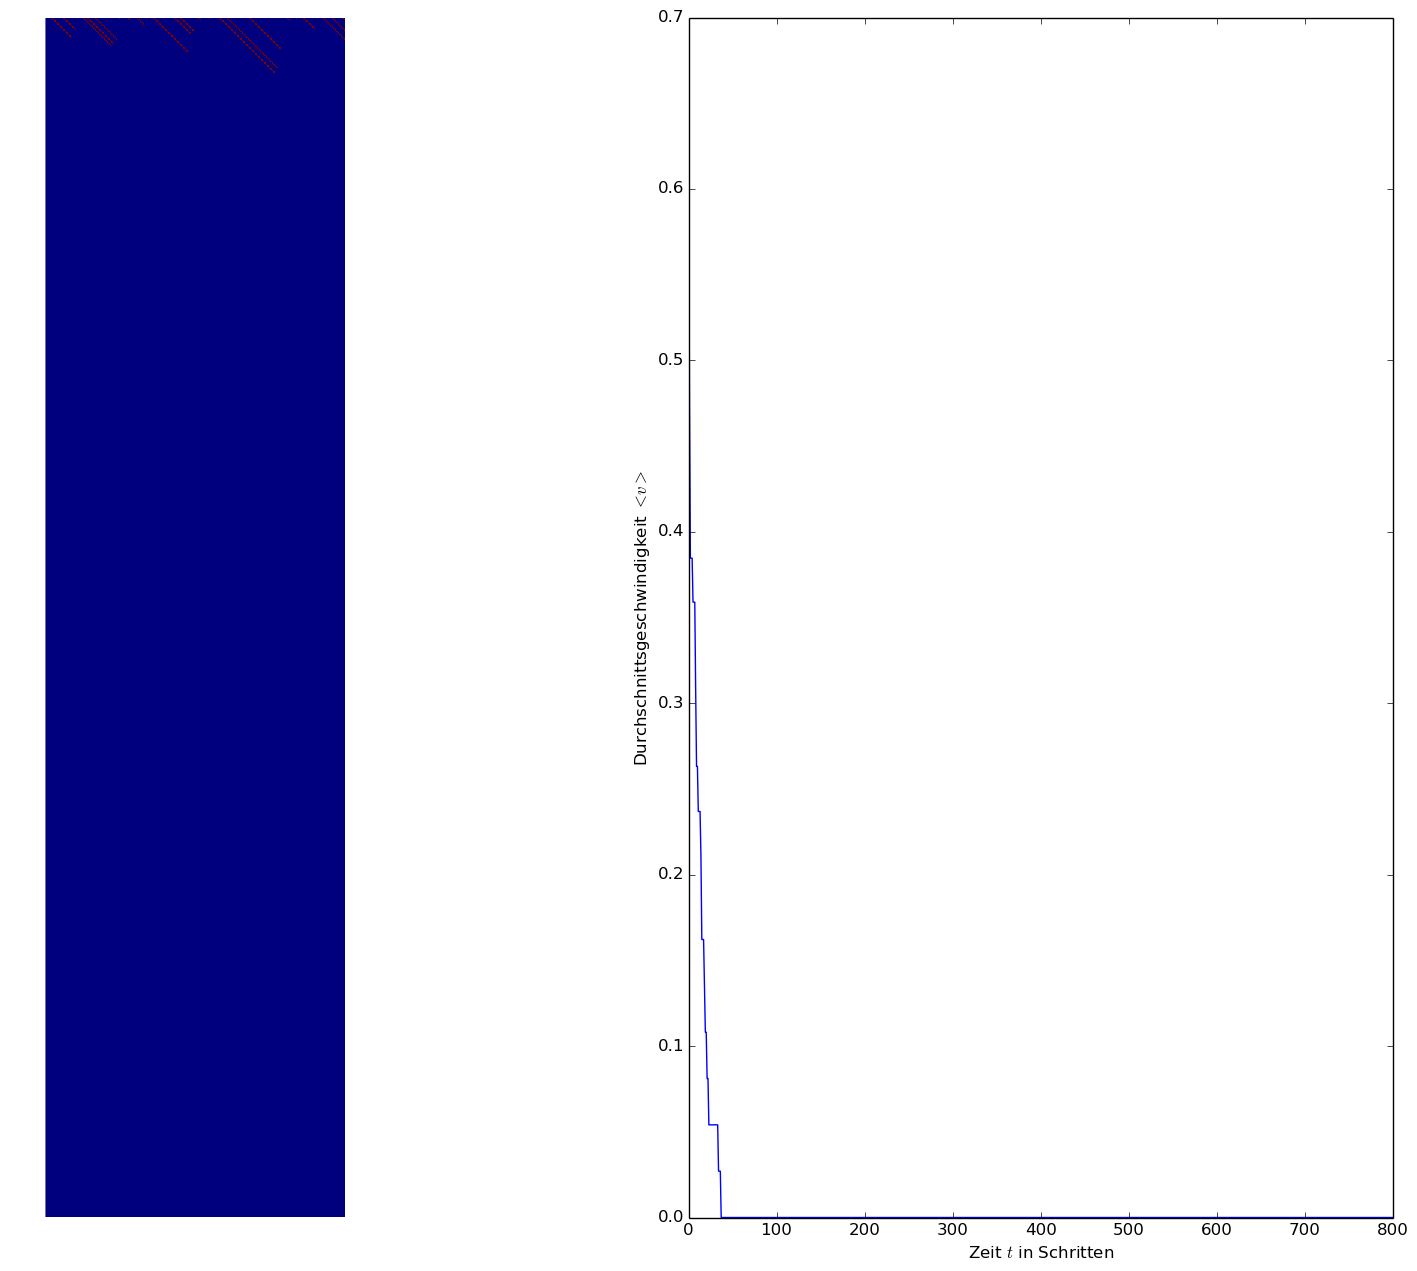

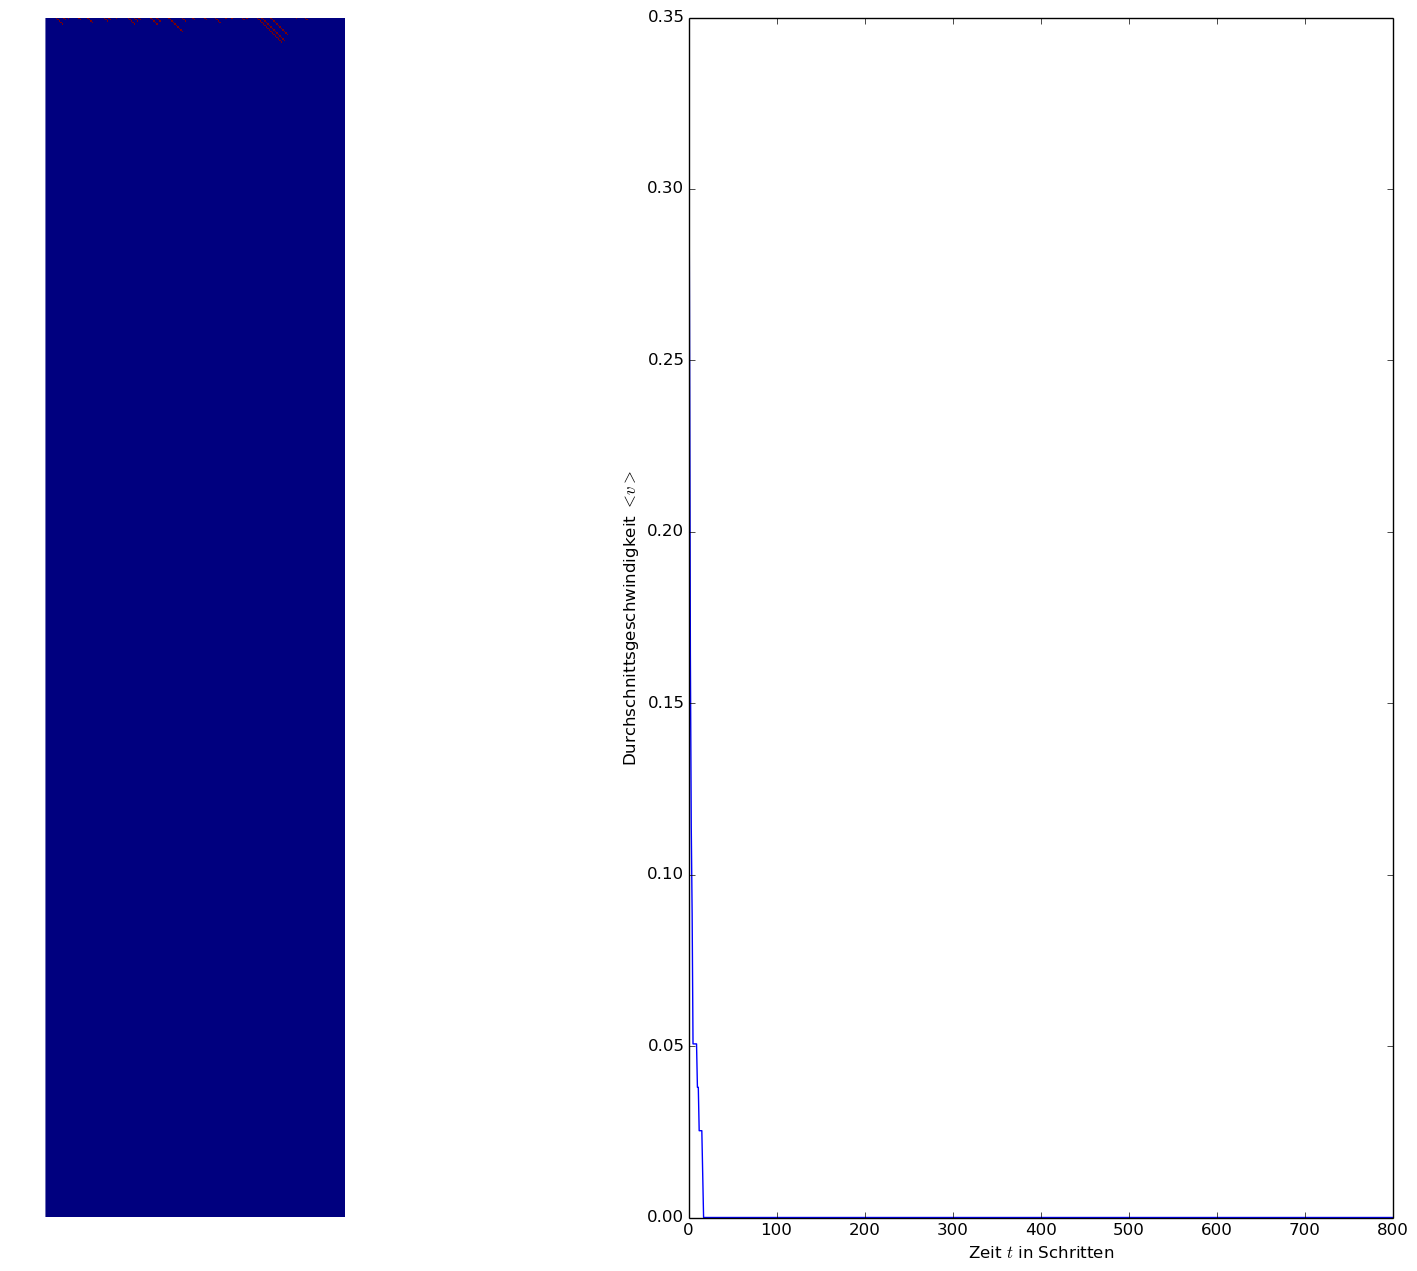

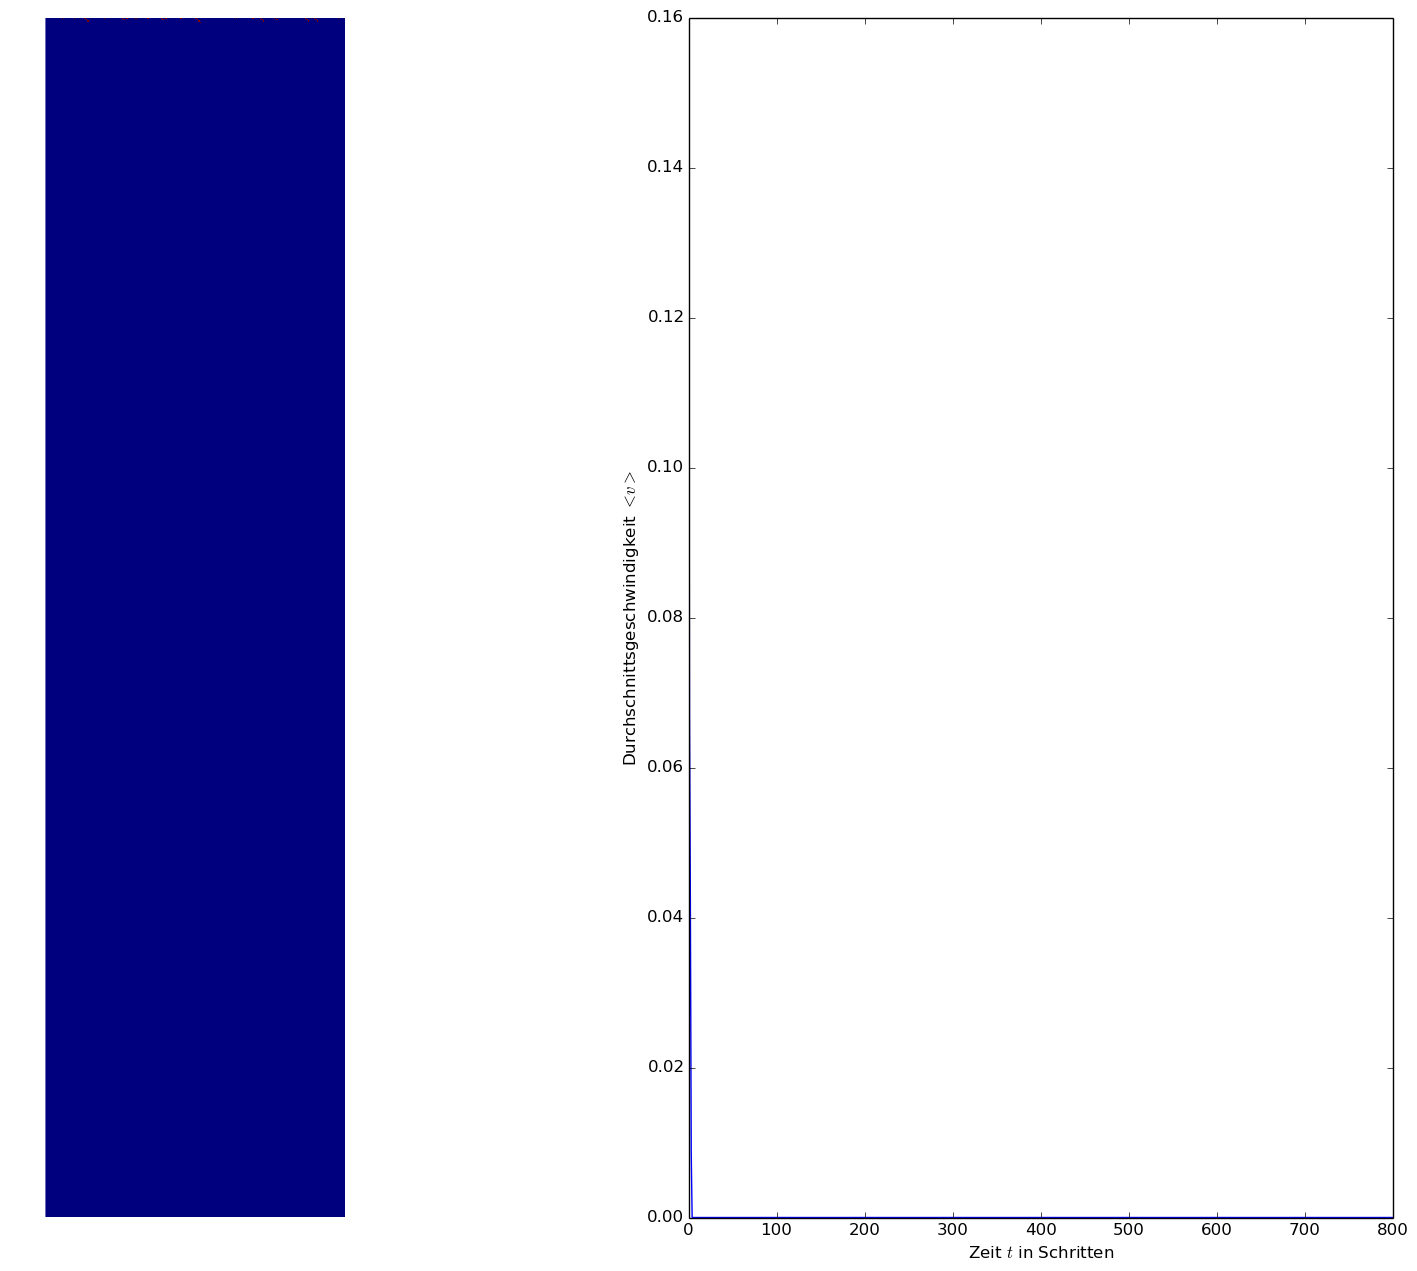

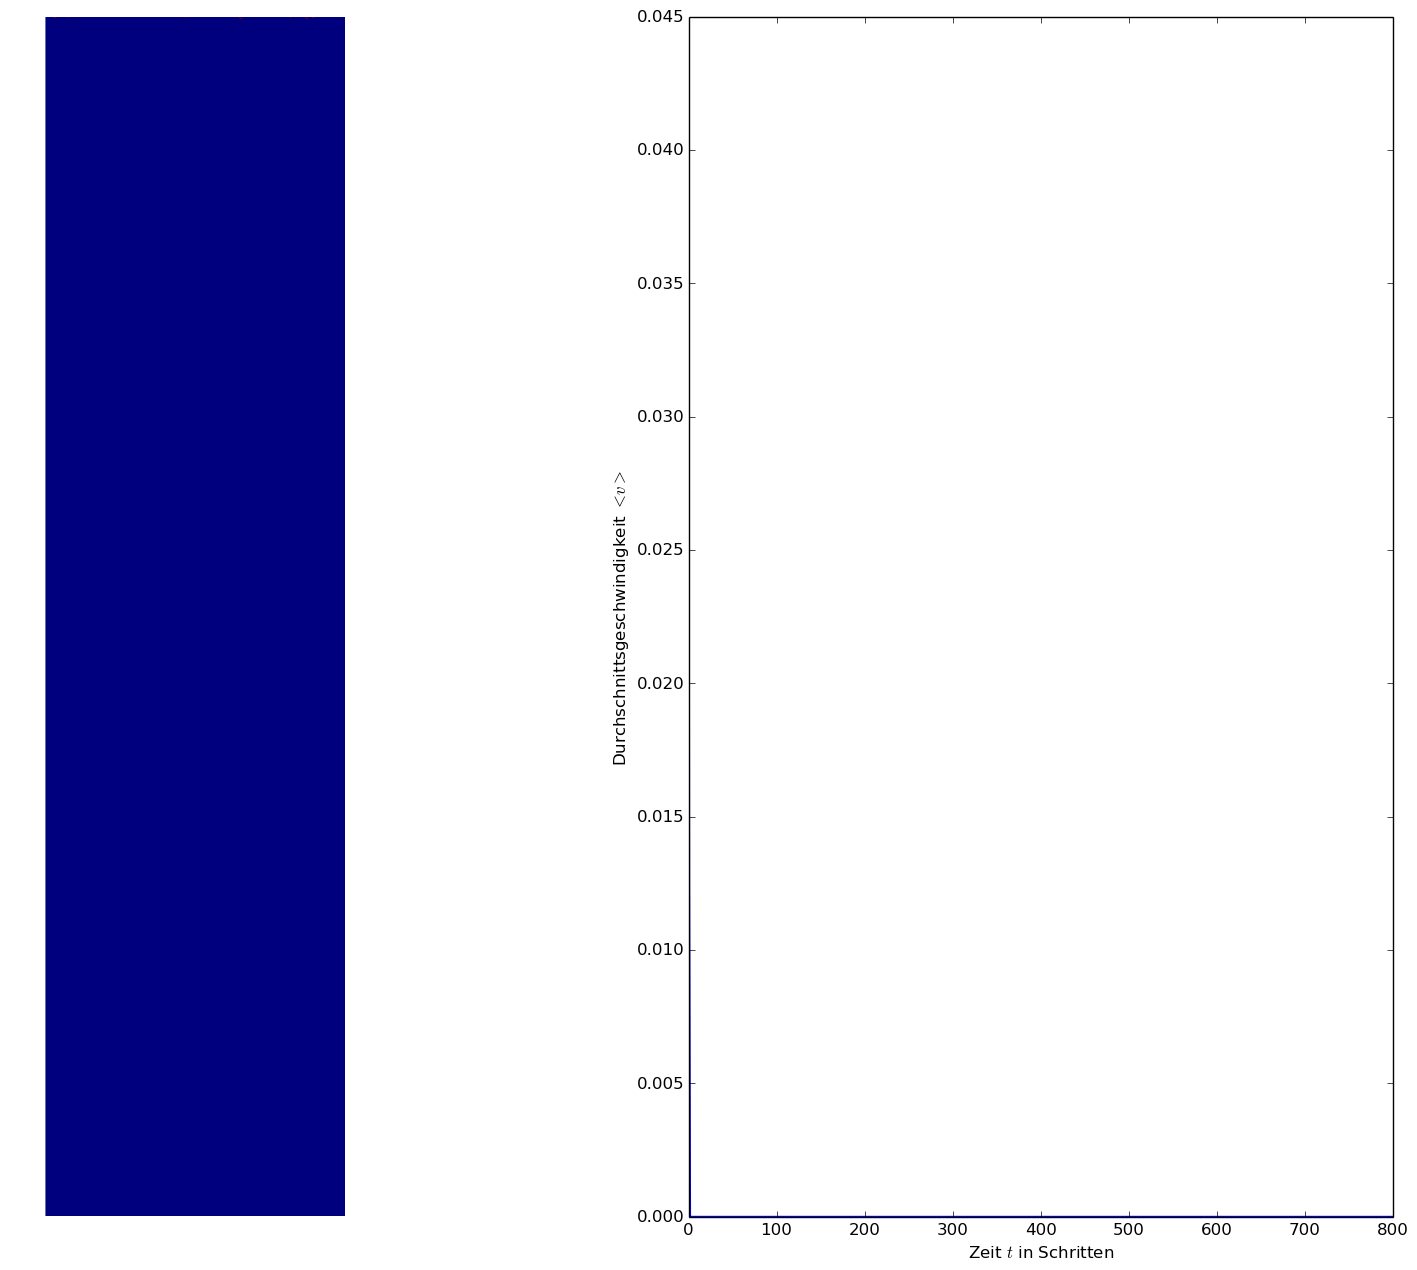

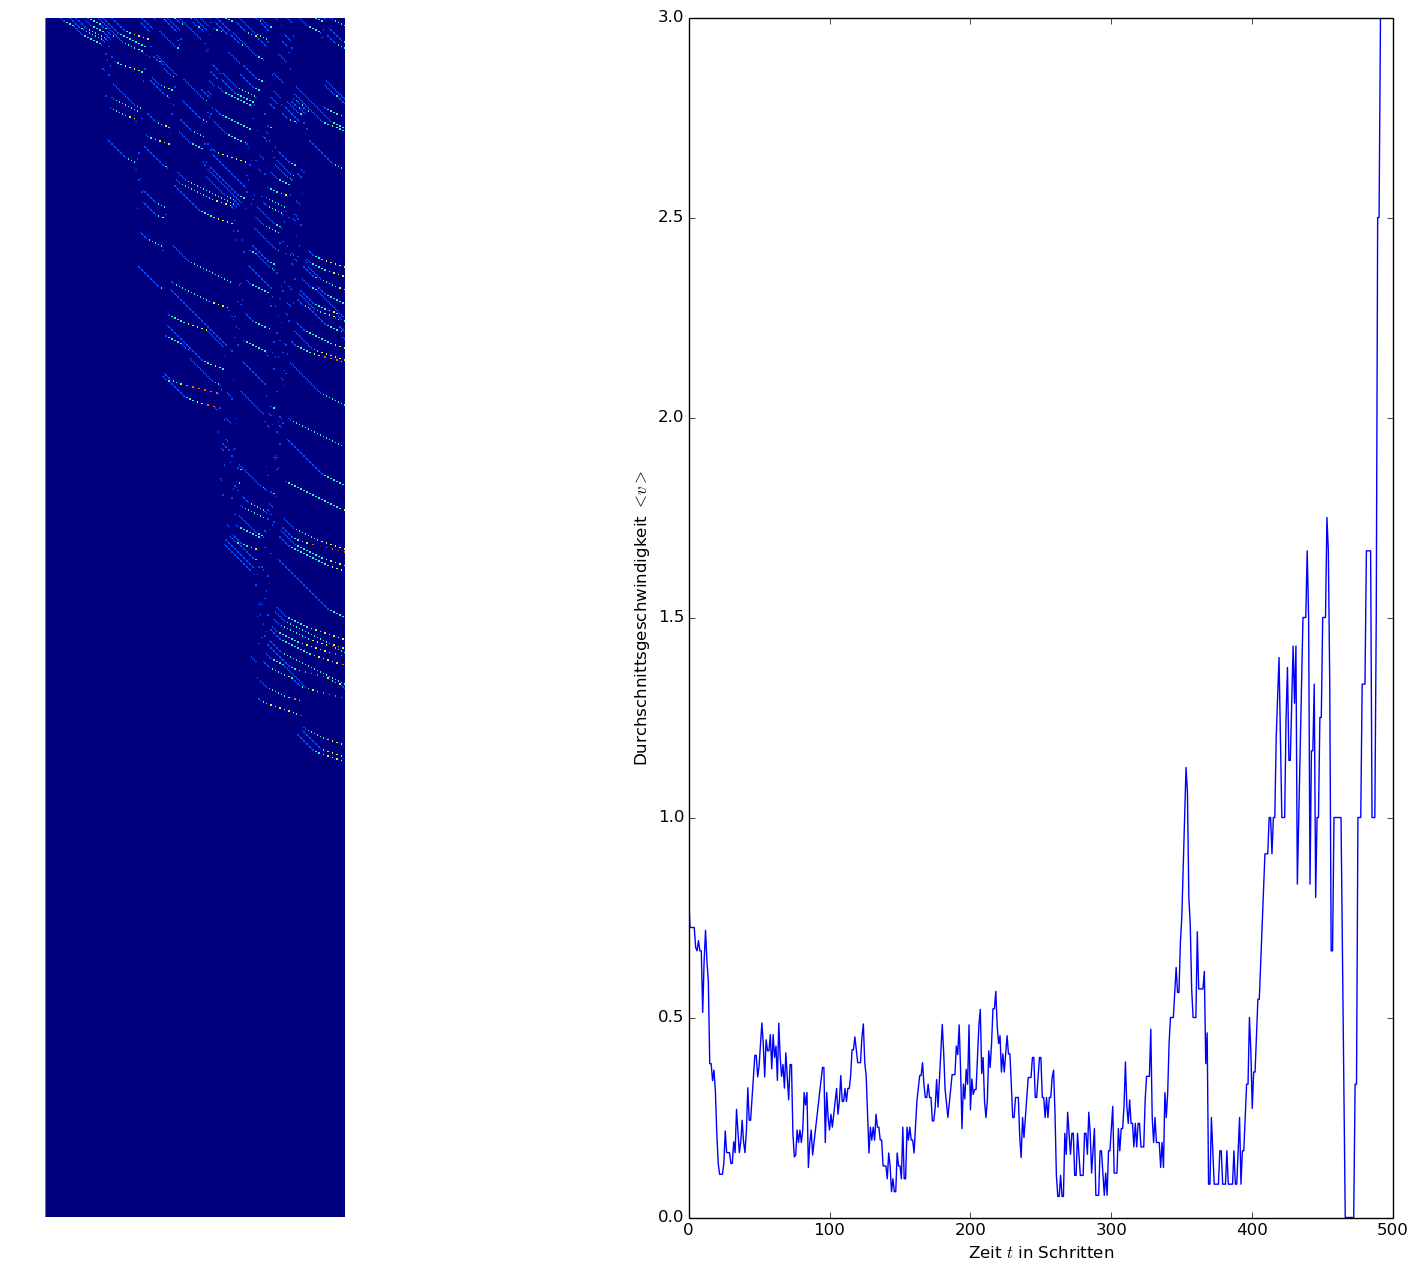

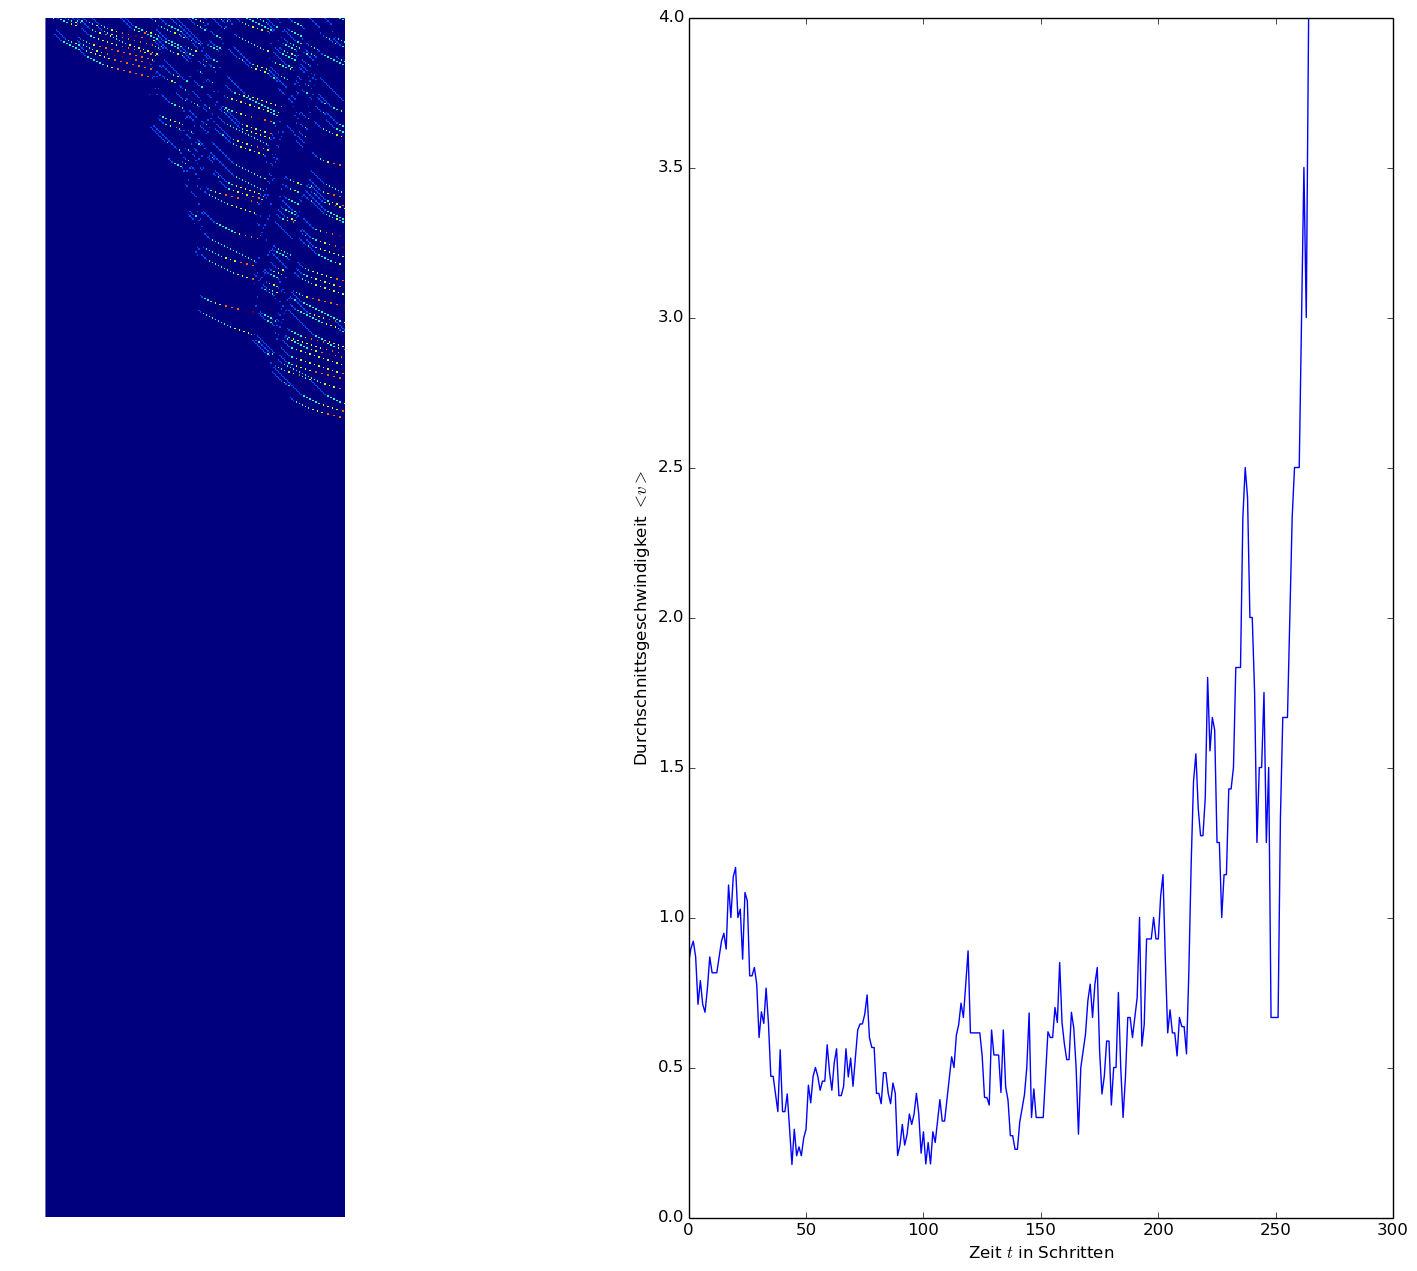

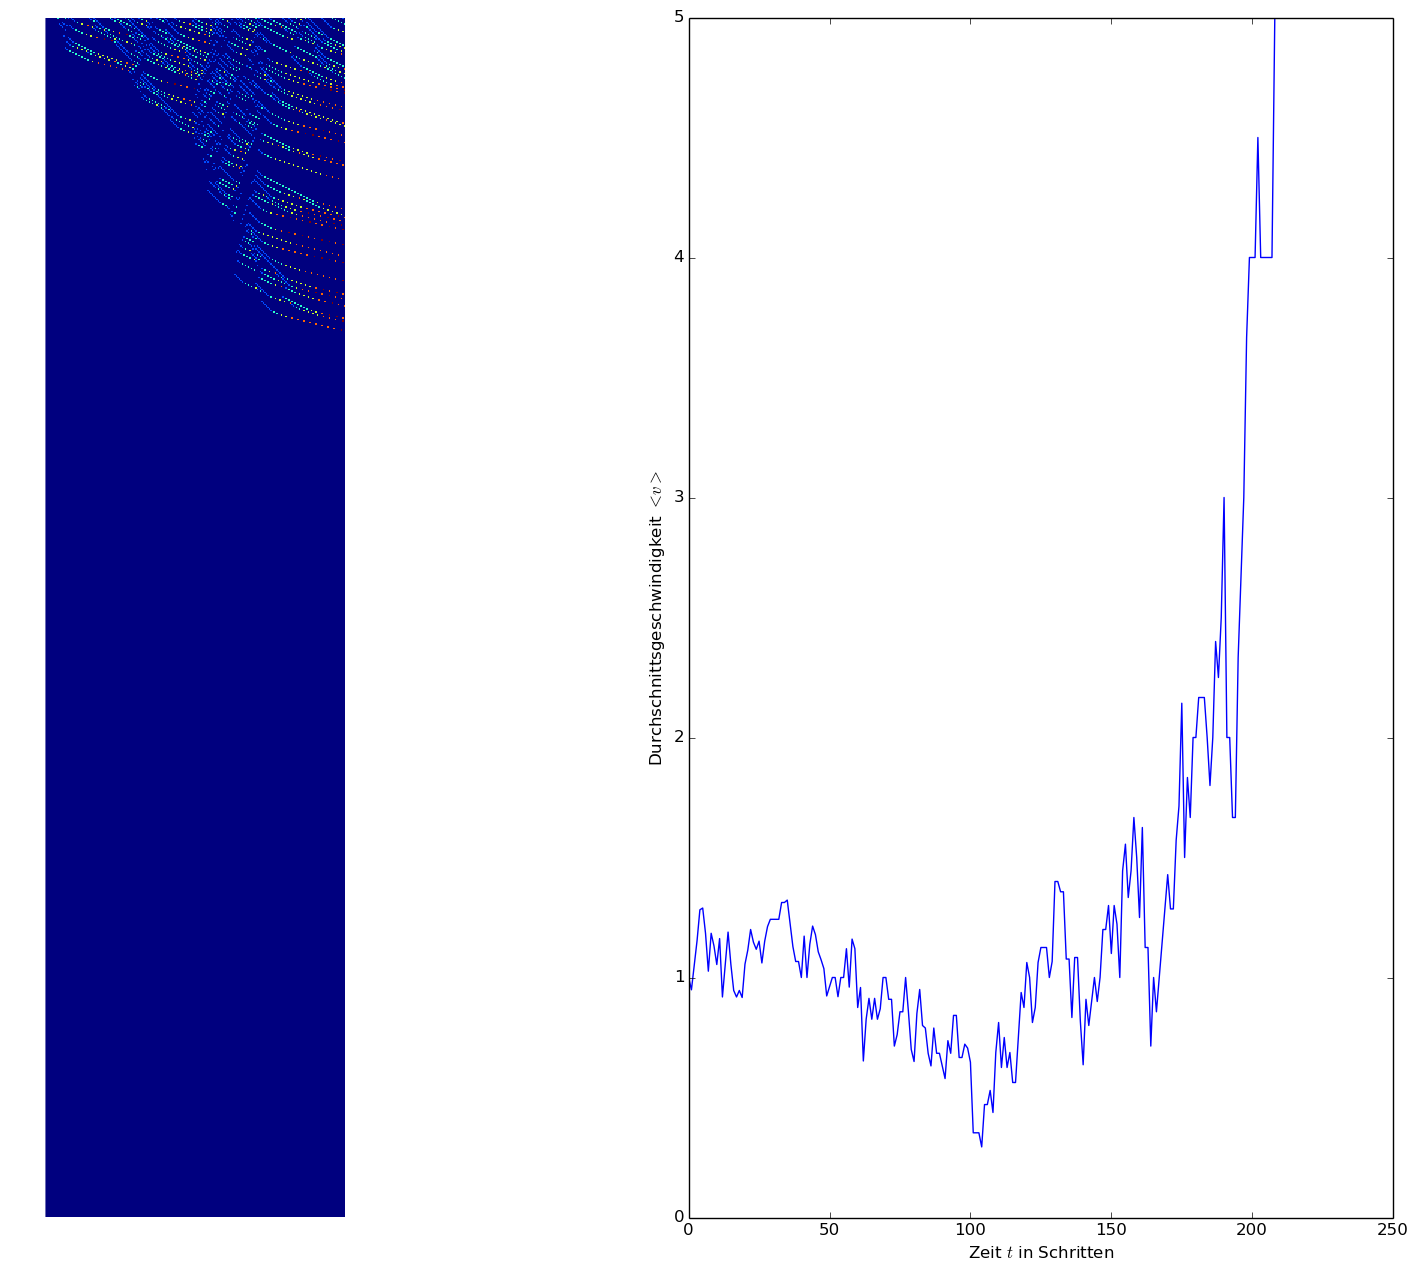

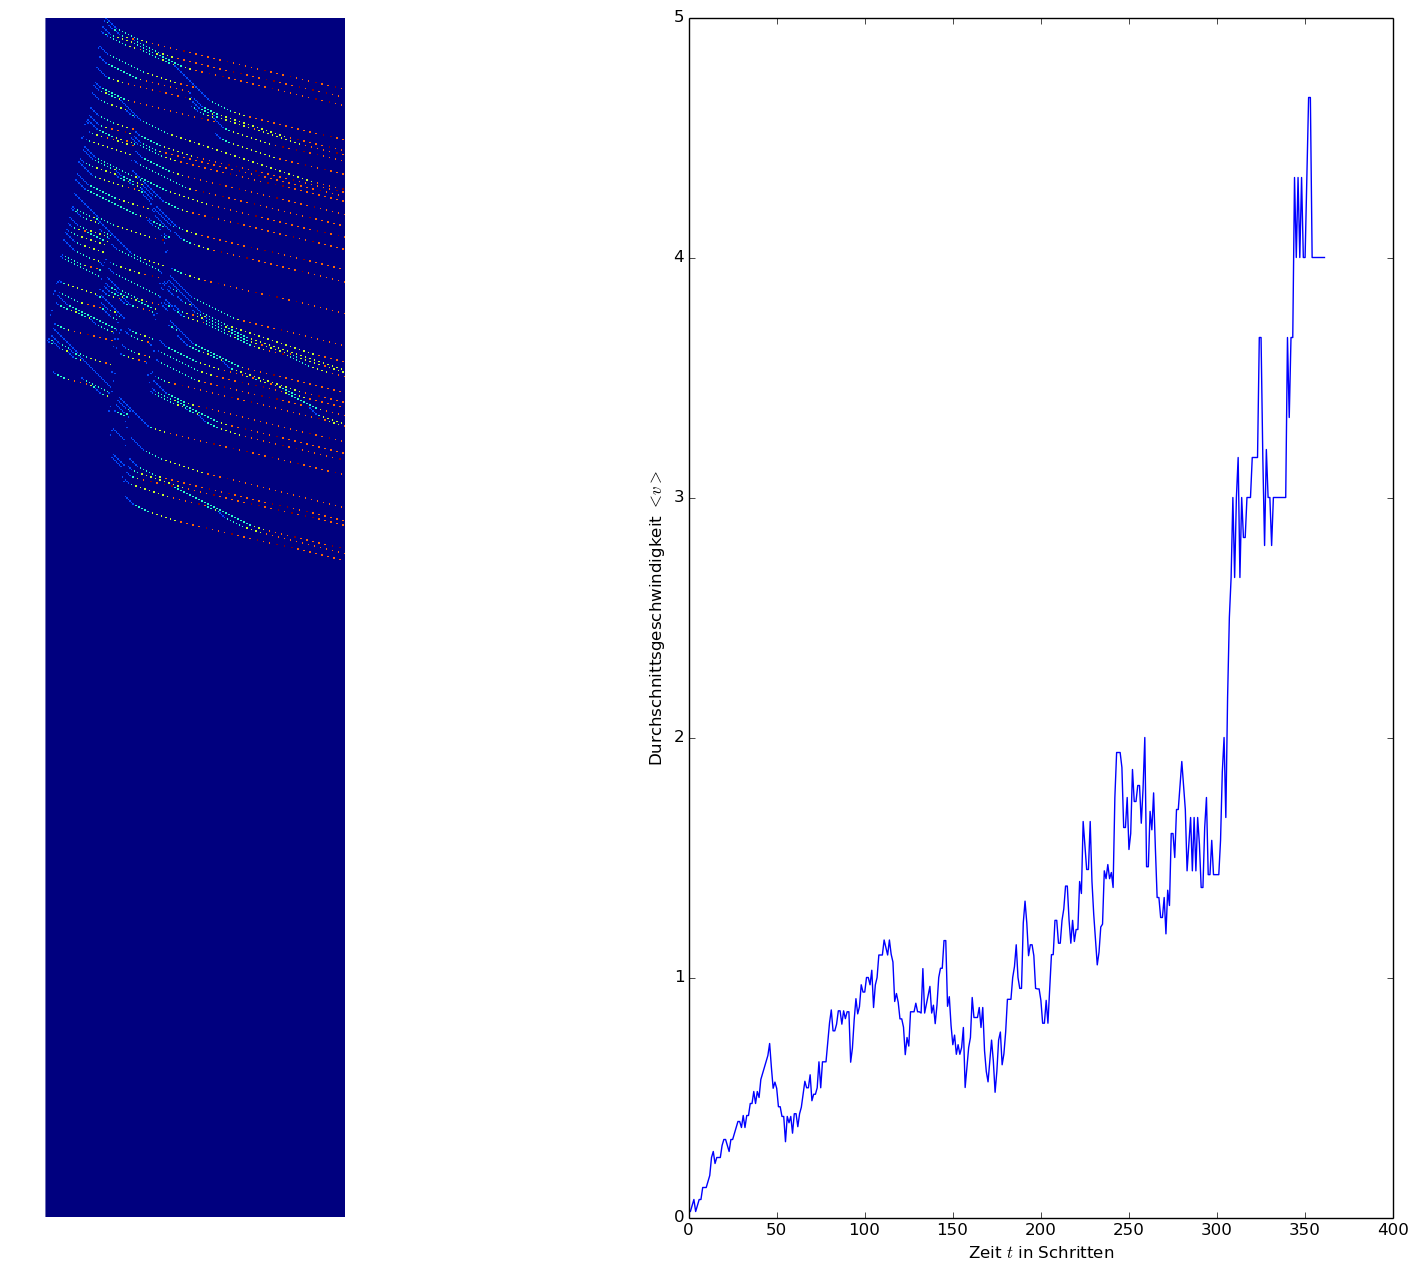

In [2]:
using PyPlot

streetlength = 200
a1 = ((0.0), (0.2, 0.4, 0.6, 0.8), "shuffle", "1. Überfüllung: ")
a2 = ((0.1, 0.2, 0.3), (0.2), "shuffle", "2. Sonntagsfahrer: ")
a3 = ((0.2), (0.2), "trafficlight", "3. Ampelstart: ")

for tuple in (a1, a2, a3)
    # get data
    dawdlings = tuple[1]
    densities = tuple[2]
    start_pos = tuple[3]
    title_prefix = tuple[4]
    
    for p in  dawdlings
        for d in densities
            # create picture
            traffic, speeds = traffic_automaton(200, d, p, start_pos)
            # plot / draw it
            figure(figsize=(20, 15))
            title(L"$title_prefix p = $p d = $d")
            ax1 = subplot(121)
            imshow(traffic, interpolation = "none")
            ax1[:axis]("off")
            subplot(122)
            plot(speeds)
            xlabel(L"Zeit $t$ in Schritten")
            ylabel(L"Durchschnittsgeschwindigkeit $<v>$")
        end
    end
end